## Example: Linear regression with Boston dataset


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## The Machine Learning problem

#### Predict outcome on unkown data

Here: predict  `Median value of owner-occupied homes in $1000's` using the rest of attributes.

## Linear regression

Assume that we have three predictors $x_1, x_2, x_3$ which we here often call __input__. Our __output__, that is the value we want to predict, is a continuous variable. Then Linear Regression is a model that predcit the ouput using the formula:

$$y = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$$


## Simplified procedure

1. Prepare data
2. Train-test split
3. Model construction.
4. Adjust parameters of the model to training dataset.
5. Evaluate model on test dataset.


In [9]:
# 1. Prepare data
X = boston.data[:, [12]]
y = boston.target

# 2. Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.1)

### Break: What we are doing?

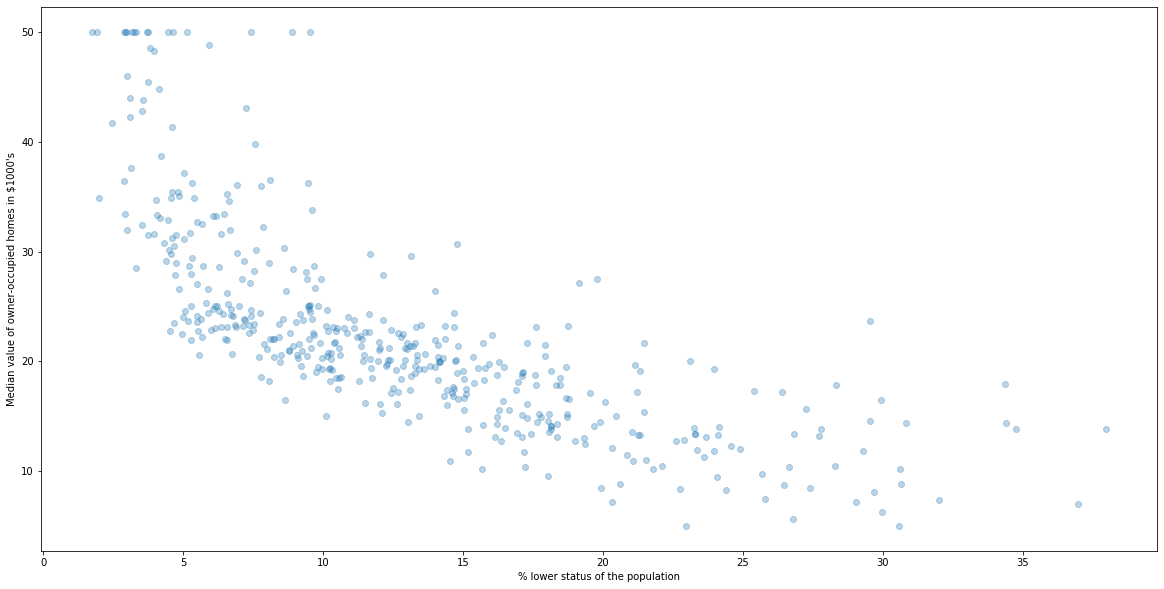

In [11]:
plt.scatter(X_train[:,0], y_train, alpha=0.3)
plt.xlabel("% lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

In [13]:
# 3. Model construction

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 4. Adjust parameters of the model to training dataset.
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Break: what we have done?

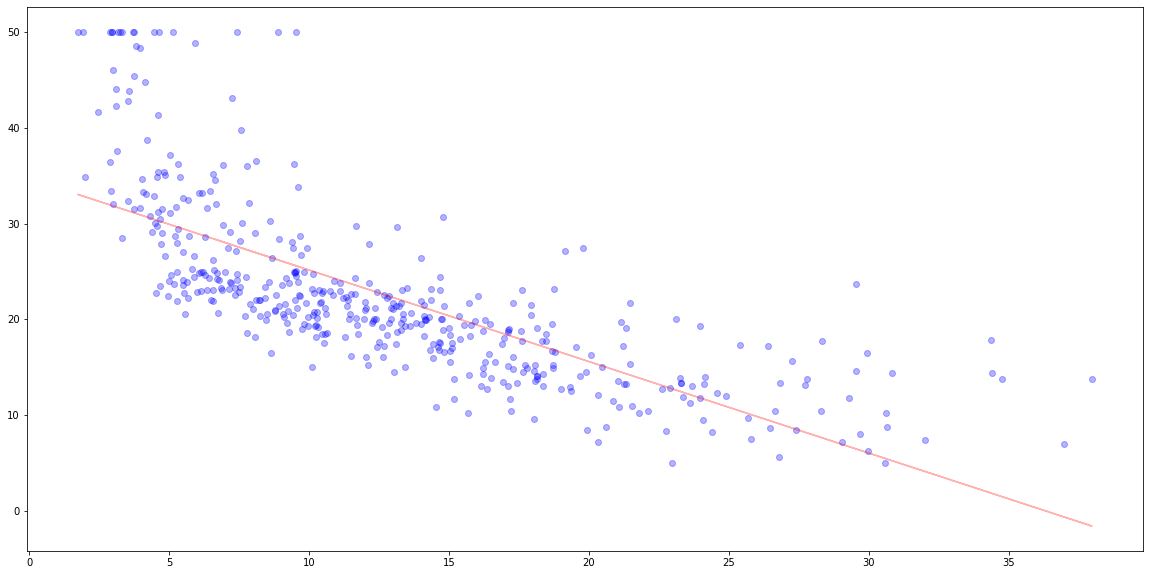

In [14]:
y_train_hat = skl_model.predict(X_train)

# Ploting real data y (blue)
plt.scatter(X_train[:,0], y_train, alpha=0.3, c="blue")
# versus predicted y_hat (red)
plt.plot(X_train[:,0], y_train_hat, alpha=0.3, c="red")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
y_test_hat = skl_model.predict(X_test)

np.sqrt(np.sqrt(mean_squared_error(y_test, y_test_hat)))

2.359284261879041

## More complete procedure
1. Prepare data
2. Train-dev-test split
3. Models construction.
4. Adjust parameters of models to training dataset.
5. Evaluate models on dev dataset and choose the best model.
6. Adjust parameters of the best model to the union of training and dev datasets.
7. Evaluate the model on test dataset.


In [17]:
# 1. Prepare data.

X = boston.data
y = boston.target

# 2. Split data into train,  dev and test.
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

In [37]:
# 3. Models construction.

class LRModel:
    
    def __init__(self, columns):
        self.columns = columns
        self.model = LinearRegression()
        
    def fit(self, X, y):
        self.model.fit(X[:, self.columns], y)
        
    def predict(self, X):
        return self.model.predict(X[:, self.columns])

In [38]:
model1 = LRModel([12])


### More models...

# your code...



In [39]:
# 4. Adjust parameters of models to training dataset.
model1.fit(X_train, y_train)

### More models...

# your code...

In [41]:
# 5. Evaluate models on dev dataset and choose the best model.

y_dev_hat = model1.predict(X_dev)
print("model1: ", np.sqrt(np.sqrt(mean_squared_error(y_dev, y_dev_hat))))

### More models...

# your code...

model1:  2.5971734986466903


In [ ]:
# 6. Adjust parameters of the best model to the union of training and dev datasets.

# your code...

In [ ]:
# 7. Evaluate the model on test dataset.

# your code...